In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
hn = pd.read_csv("news_posts.csv")

In [5]:
hn.head()

,id,title,url,num_points,num_comments,author,created_at
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52
1,10975351,How to Use Open Source and Shut the Fuck Up at...,http://hueniverse.com/2016/01/26/how-to-use-op...,39,10,josep2,1/26/2016 19:30
2,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20
3,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,6/17/2016 0:01
4,10301696,Note by Note: The Making of Steinway L1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,9/30/2015 4:12


In [6]:
hn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20100 entries, 0 to 20099
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            20100 non-null  int64 
 1   title         20100 non-null  object
 2   url           17660 non-null  object
 3   num_points    20100 non-null  int64 
 4   num_comments  20100 non-null  int64 
 5   author        20100 non-null  object
 6   created_at    20100 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.1+ MB


In [8]:
hn = pd.read_csv("news_posts.csv", parse_dates=["created_at"])

In [9]:
hn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20100 entries, 0 to 20099
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            20100 non-null  int64         
 1   title         20100 non-null  object        
 2   url           17660 non-null  object        
 3   num_points    20100 non-null  int64         
 4   num_comments  20100 non-null  int64         
 5   author        20100 non-null  object        
 6   created_at    20100 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 1.1+ MB


In [11]:
hn["created_at"] = pd.to_datetime(hn["created_at"])

In [12]:
hn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20100 entries, 0 to 20099
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            20100 non-null  int64         
 1   title         20100 non-null  object        
 2   url           17660 non-null  object        
 3   num_points    20100 non-null  int64         
 4   num_comments  20100 non-null  int64         
 5   author        20100 non-null  object        
 6   created_at    20100 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 1.1+ MB


In [13]:
hn.columns

Index(['id', 'title', 'url', 'num_points', 'num_comments', 'author',
       'created_at'],
      dtype='object')

In [17]:
hn = hn[['created_at','id', 'title',
    'url', 'num_points', 'num_comments', 'author']]

### creating two data frames "ask Hn" and "show Hn" to see which one has more number of comments

### 'Ask Hn' and 'Show Hn' comes at the begning of the Title 

In [29]:
ask_bol = hn["title"].str.lower().str.startswith("ask hn")

In [30]:
show_bol = hn["title"].str.lower().str.startswith("show hn")

In [47]:
ask_posts = hn[ask_bol].copy()
show_posts = hn[show_bol].copy()

In [33]:
show_posts.head(5)

,created_at,id,title,url,num_points,num_comments,author
13,2015-11-25 14:03:00,10627194,Show HN: Wio Link ESP8266 Based Web of Things...,https://iot.seeed.cc,26,22,kfihihc
39,2015-11-29 22:46:00,10646440,Show HN: Something pointless I made,http://dn.ht/picklecat/,747,102,dhotson
46,2016-04-28 18:05:00,11590768,"Show HN: Shanhu.io, a programming playground p...",https://shanhu.io,1,1,h8liu
84,2016-07-28 07:11:00,12178806,Show HN: Webscope Easy way for web developers...,http://webscopeapp.com,3,3,fastbrick
97,2016-01-09 20:45:00,10872799,Show HN: GeoScreenshot Easily test Geo-IP bas...,https://www.geoscreenshot.com/,1,9,kpsychwave


In [48]:
other_post = hn[~(ask_bol | show_bol)].copy()

In [35]:
other_post.head(5)

,created_at,id,title,url,num_points,num_comments,author
0,2016-08-04 11:52:00,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte
1,2016-01-26 19:30:00,10975351,How to Use Open Source and Shut the Fuck Up at...,http://hueniverse.com/2016/01/26/how-to-use-op...,39,10,josep2
2,2016-06-23 22:20:00,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash
3,2016-06-17 00:01:00,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna
4,2015-09-30 04:12:00,10301696,Note by Note: The Making of Steinway L1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell


In [36]:
ask_avg_comments = ask_posts["num_comments"].mean()
show_avg_comments = show_posts["num_comments"].mean()

print(ask_avg_comments, show_avg_comments)

14.038417431192661 10.31669535283993


### making series 

In [39]:
avg_comments = pd.Series({"ask_comment":ask_avg_comments, "show_comment":show_avg_comments})

In [40]:
avg_comments

ask_comment     14.038417
show_comment    10.316695
dtype: float64

In [42]:
hn["num_comments"].head(2)

0    52
1    10
Name: num_comments, dtype: int64

### when want to visualise data angainst categories, you either make pie chart or barchart

### Pie Chart: when percentages are given,  Bar Chart: when absolute values are given

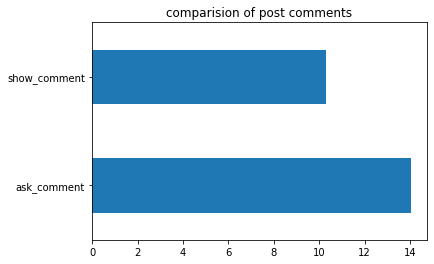

In [46]:
avg_comments.plot.barh(title = "comparision of post comments")
plt.show()

In [49]:
ask_posts["hours"] = ask_posts["created_at"].dt.hour

In [50]:
ask_posts.head()

,created_at,id,title,url,num_points,num_comments,author,hours
7,2016-08-16 09:55:00,12296411,Ask HN: How to improve my personal website?,NaN,2,6,ahmedbaracat,9
17,2015-11-22 13:43:00,10610020,Ask HN: Am I the only one outraged by Twitter ...,NaN,28,29,tkfx,13
22,2016-05-02 10:14:00,11610310,Ask HN: Aby recent changes to CSS that broke m...,NaN,1,1,polskibus,10
30,2016-08-02 14:20:00,12210105,Ask HN: Looking for Employee #3 How do I do it?,NaN,1,3,sph130,14
31,2015-10-15 16:38:00,10394168,Ask HN: Someone offered to buy my browser exte...,NaN,28,17,roykolak,16


In [52]:
ask_posts.groupby("hours")["num_comments"].mean().sort_values(ascending = False)

hours
15    38.594828
2     23.810345
20    21.525000
16    16.796296
21    16.009174
13    14.741176
10    13.440678
14    13.233645
18    13.201835
17    11.460000
1     11.383333
11    11.051724
19    10.800000
8     10.250000
5     10.086957
12     9.410959
6      9.022727
0      8.127273
23     7.985294
7      7.852941
3      7.796296
4      7.170213
22     6.746479
9      5.577778
Name: num_comments, dtype: float64